<a href="https://colab.research.google.com/github/Abhishek4848/Amazon-product-listing-Analysis/blob/master/AmazonDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing modules


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = 'https://raw.githubusercontent.com/Abhishek4848/Amazon-product-listing-Analysis/master/AmazonData.csv'
amzn = pd.read_csv(url, error_bad_lines=False)

In [6]:
amzn.head()

,Uniq Id,Crawl Timestamp,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Offers,Combo Offers,Stock Availibility
0,eb49cc038190f6f03c272f79fbbce894,2019-10-30 11:38:11 +0000,Skin Care,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,Lee Posh,NaN,2000,799,60.05%,NaN,YES
1,1657cc30c438affede6a5060d6847363,2019-10-31 15:46:54 +0000,Skin Care,Branded SLB Works New 1.5mm Titanium 1200 nee...,Item name: 1.5mm titanium 1200 needles microne...,SLB Works,NaN,2040,2040,0%,NaN,YES
2,41654633cce38c8650690f6dbac01fd3,2019-10-30 09:53:23 +0000,Skin Care,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",Generic,NaN,1824,1042,42.87%,NaN,YES
3,08b1bd85c3efc2d7aa556fd79b073382,2019-10-29 16:16:52 +0000,Skin Care,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,Generic,NaN,2185,1399,35.97%,NaN,YES
4,3ac3f213732512d1d11bb73ab3b1900f,2019-10-31 09:32:06 +0000,Grocery & Gourmet Foods,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in India,Harveys,NaN,594,570,4.04%,NaN,YES


###Rows,Columns

In [7]:
amzn.shape

(30000, 12)

###No. of NULL/Na values in each field

In [8]:
amzn.isna().sum()

Uniq Id                      0
Crawl Timestamp              0
Category                     0
Product Title                0
Product Description       1990
Brand                       87
Pack Size Or Quantity    19776
Mrp                        699
Price                      600
Offers                     466
Combo Offers             29963
Stock Availibility           0
dtype: int64

In [9]:
amzn['Brand'].value_counts()

CHOCOCRAFT              1465
Generic                 1284
Chocholik                698
World Beauty             527
BOGATCHI                 420
                        ... 
Baoishi                    1
Kicking Horse Coffee       1
Miracle Stone              1
fyc professional           1
Brocato                    1
Name: Brand, Length: 8454, dtype: int64

In [10]:
amzn['Mrp'].describe()

count     29301
unique     6371
top         999
freq        808
Name: Mrp, dtype: object

In [11]:
amzn.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Category', 'Product Title',
       'Product Description', 'Brand', 'Pack Size Or Quantity', 'Mrp', 'Price',
       'Offers', 'Combo Offers', 'Stock Availibility'],
      dtype='object')

In [12]:
amzn['Product Title'].value_counts()

 Xplus Bath Loofah(Pack of 3)                                                                                                                          39
 Bogatchi Chocolate Gift Box, Happy Diwali Chocolate, Diwali Chocolate Gifts, Diwali Chocolate Gift, Diwali Chocolate Bar, Diwali Gifts, 15 Pieces     16
 Xplus Bath Loofah                                                                                                                                     11
 Midiron Happy Raksha Bandhan Return Gift for Sister with Printed Ceramic Mug and 2 Chocolate Bar                                                       8
 Zyrex Forever Long Cream-100 Gram A Natural Magical Cream With Imported Korean Herbs                                                                   6
                                                                                                                                                       ..
 QTICA Natural Nail Growth Stimulator - .5oz                                

  #### HEATMAP FOR NULL VALUES

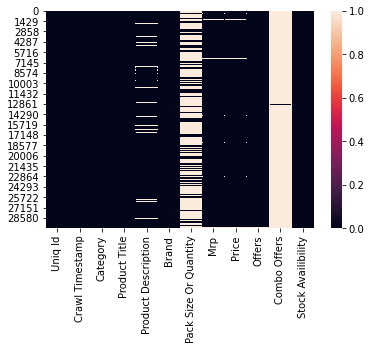

In [13]:
sns.heatmap(amzn.isna())

## DATA CLEANING

## brand column fix

In [14]:
#there are empty spaces in brand column which is as good as NaN value
amzn['Brand'].replace(' ',np.NaN,inplace=True)
print("EMPTY VALUES IN BRAND COLUMN: ",amzn['Brand'].isna().sum())

EMPTY VALUES IN BRAND COLUMN:  184


since there is only 184 empty  in the brand column , we can impute these values instead of removing it.

In [15]:
amzn['Brand'].replace(np.NaN,-1,inplace=True)
for i in range(len(amzn['Uniq Id'])):
    if(amzn['Brand'][i] == -1):
        brand = amzn['Product Title'][i].strip().split(' ')
        amzn['Brand'][i] = " ".join(brand[0:2])
        #print(brand[0:2])

In [16]:
amzn.isna().sum()

Uniq Id                      0
Crawl Timestamp              0
Category                     0
Product Title                0
Product Description       1990
Brand                        0
Pack Size Or Quantity    19776
Mrp                        699
Price                      600
Offers                     466
Combo Offers             29963
Stock Availibility           0
dtype: int64

### Price Coulumn Fix

In [17]:
amzn['Price'].replace('NAN',np.NaN,inplace=True)
print("EMPTY VALUES IN PRICE COLUMN: ",amzn['Price'].isna().sum())

EMPTY VALUES IN PRICE COLUMN:  600


In [18]:
for i in range(len(amzn['Uniq Id'])):
  try:
    amzn['Price'][i] == float(amzn['Price'][i])
  except:
    price = float(amzn['Price'][i][1:])
    amzn['Price'][i] = price

In [19]:
amzn['Category'].value_counts()

Skin Care                  15033
Grocery & Gourmet Foods     8064
Hair Care                   2459
Bath & Shower               2140
Fragrance                   2107
Detergents & Dishwash        197
Name: Category, dtype: int64

In [20]:
amzn['Price'] = amzn['Price'].astype('float')
skin_care = amzn[amzn['Category'] == 'Skin Care']
grocery =  amzn[amzn['Category'] == 'Grocery & Gourmet Foods']
bath = amzn[amzn['Category'] == 'Bath & Shower']
fragrance = amzn[amzn['Category'] == 'Fragrance']
Hair = amzn[amzn['Category'] == 'Hair Care']
Dish =amzn[amzn['Category'] == 'Skin Care']
#np.mean([amzn['Price'][i]=='Hair Care' for i in range(len(amzn['Uniq Id']))])

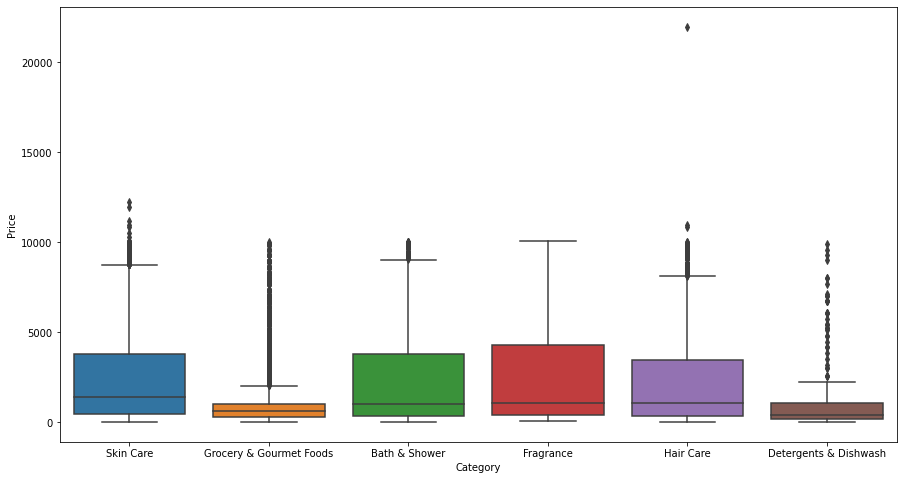

In [21]:
plt.figure(figsize = (15,8))
sns.boxplot(y = amzn['Price'],  x = amzn['Category'])

In [22]:
print("THE MEDIAN PRICE FOR THE CATEGORY SKIN CARE IS : ",np.nanmedian(skin_care['Price']))
skin_care['Price'].fillna(np.nanmedian(skin_care['Price']),inplace=True)
print("THE MEDIAN PRICE FOR THE CATEGORY GROCERY IS : ",np.nanmedian(grocery['Price']))
grocery['Price'].fillna(np.nanmedian(grocery['Price']),inplace=True)
print("THE MEDIAN PRICE FOR THE CATEGORY BATH & SHOWER IS : ",np.nanmedian(bath['Price']))
bath['Price'].fillna(np.nanmedian(bath['Price']),inplace=True)
print("THE MEDIAN PRICE FOR THE CATEGORY FRAGRANCE IS : ",np.nanmedian(fragrance['Price']))
fragrance['Price'].fillna(np.nanmedian(fragrance['Price']),inplace=True)
print("THE MEDIAN PRICE FOR THE CATEGORY HAIR CARE IS : ",np.nanmedian(Hair['Price']))
Hair['Price'].fillna(np.nanmedian(Hair['Price']),inplace=True)
print("THE MEDIAN PRICE FOR THE CATEGORY DETERGENTS & DISHWASH IS : ",np.nanmedian(Dish['Price']))
Dish['Price'].fillna(np.nanmedian(Dish['Price']),inplace=True)

THE MEDIAN PRICE FOR THE CATEGORY SKIN CARE IS :  1390.0
THE MEDIAN PRICE FOR THE CATEGORY GROCERY IS :  630.0
THE MEDIAN PRICE FOR THE CATEGORY BATH & SHOWER IS :  1029.0
THE MEDIAN PRICE FOR THE CATEGORY FRAGRANCE IS :  1056.5
THE MEDIAN PRICE FOR THE CATEGORY HAIR CARE IS :  1047.5
THE MEDIAN PRICE FOR THE CATEGORY DETERGENTS & DISHWASH IS :  1390.0


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [27]:
amzn = pd.concat([skin_care,grocery,bath,fragrance,Hair,Dish])
amzn.isna().sum()

Uniq Id                      0
Crawl Timestamp              0
Category                     0
Product Title                0
Product Description       2858
Brand                        0
Pack Size Or Quantity    31292
Mrp                       1239
Price                        0
Offers                     838
Combo Offers             44783
Stock Availibility           0
dtype: int64